In [208]:
import csv
import os
from datetime import datetime
import math
import matplotlib.pyplot as plt
import numpy as np

In [209]:
options_dir = '../data/options_data'
for ticker in os.listdir(options_dir):
    ticker_dir = options_dir + '/' + ticker
    call_files = []
    for file in os.listdir(ticker_dir):
        file_heruistics = file.split('_')
        strike = file_heruistics[2].split('-', 1)
        expiry_date = datetime.strptime(file_heruistics[1], '%Y%m%d').date()

        if 'c' in strike[0].replace('.csv', ''):
            call_files.append((file, expiry_date))

    call_files.sort(key=lambda contract: contract[1])

    #implement covered call strategy
    balance = 100000
    ownUnderlying = False
    underlyingQuantity = 0 # in hundreds

    csv_data = []

    for file, expiry_date in call_files:
        with open(os.path.join(ticker_dir, file), 'r') as f:
            strike_csv = csv.reader(f)
            row = list(strike_csv)

            for index, line in reversed(list(enumerate(row[0:len(row)-1]))):
                date = datetime.strptime(line[0], '%m/%d/%Y').date()
                if date.month == expiry_date.month:
                    start_open = float(row[index][1])
                    strike_price = float(row[index][16])
                    start_price = float(row[index][15])
                    end_price = float(row[1][15])
                    break

            # buy shares by the even hundreds + subtract balance
            if ownUnderlying == False:
                underlyingQuantity = math.floor(balance/(start_price * 100))
                balance -= (start_price * 100) * underlyingQuantity
                ownUnderlying = True

            # calculate profit of selling contract and add to balance
            contract_profit = underlyingQuantity * start_open * 100
            balance += contract_profit

            total_balance = balance + (underlyingQuantity * 100 * end_price)

            # obtain 'results'
            net_percentage = ((total_balance - 100000) / 100000) * 100
            net_return = total_balance - 100000

            csv_data.append([expiry_date, date, strike_price, start_price, end_price, start_open, underlyingQuantity, contract_profit, total_balance, net_percentage, net_return])

            # compare end asset price to strike price
            if end_price >= strike_price:
                stockSale = underlyingQuantity * 100 * end_price
                balance += stockSale

                ownUnderlying = False
                underlyingQuantity = 0

    with open('../data/outputs/covered_call/' + ticker + '.csv', 'w', newline="") as f:
        writer = csv.writer(f)

        header = ['Expiration Date', 'Date Contact Sold', 'Strike Price', 'Starting asset price', 'Ending Asset Price', 'Price Per Contract', 'Contracts Sold', 'Contract Profit', 'Monthly Ending Balance', 'Percent Change', 'Profit Amount']
        writer.writerow(header)

        for row in csv_data:
            writer.writerow(row)

F.csv
data points: 24
x-axis values: ['11/2019', '12/2019', '1/2020', '2/2020', '3/2020', '4/2020', '5/2020', '6/2020', '7/2020', '8/2020', '9/2020', '10/2020', '11/2020', '12/2020', '1/2021', '2/2021', '3/2021', '4/2021', '5/2021', '6/2021', '7/2021', '8/2021', '9/2021', '10/2021']
y-axis values: [101120.0, 109520.0, 110796.0, 100095.0, 59751.0, 73650.0, 77524.0, 103897.0, 123792.0, 129157.0, 144844.0, 171594.0, 206670.0, 209569.0, 232538.0, 259716.0, 287364.0, 302468.0, 357848.0, 361704.0, 349895.0, 337122.0, 377128.0, 476612.0]
y2-axis vals: [97685.19, 63888.89, 50810.19, 61458.33, 71990.74, 68171.3, 33564.81, 41782.41, 35416.67, 21875.0, 1736.11, 5092.59, -10532.41, -22916.67, -21064.81, -23495.37, -29629.63, -33912.04, -41087.96, -44097.22, -19444.44, 2083.33, 7638.89, 4861.11]


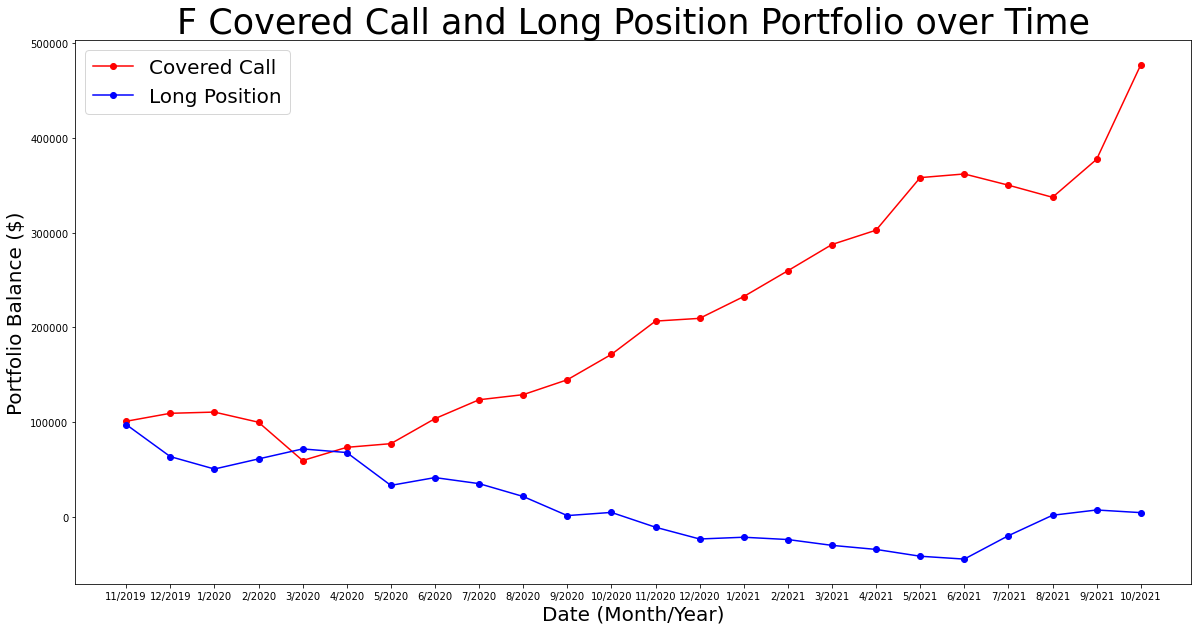

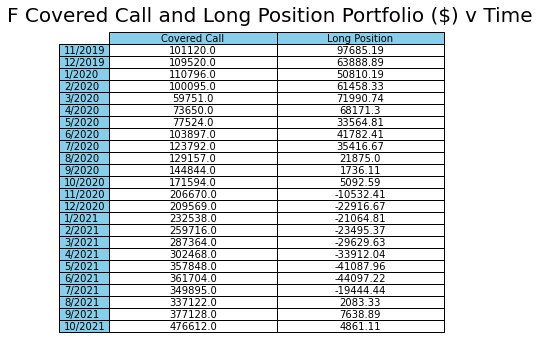

GM.csv
data points: 24
x-axis values: ['11/2019', '12/2019', '1/2020', '2/2020', '3/2020', '4/2020', '5/2020', '6/2020', '7/2020', '8/2020', '9/2020', '10/2020', '11/2020', '12/2020', '1/2021', '2/2021', '3/2021', '4/2021', '5/2021', '6/2021', '7/2021', '8/2021', '9/2021', '10/2021']
y-axis values: [96048.0, 102418.0, 99421.0, 111706.0, 70056.0, 89831.0, 102347.0, 105862.0, 118084.0, 136300.0, 150520.0, 172521.0, 223432.0, 215832.0, 275182.0, 296276.0, 348300.0, 364620.0, 375582.0, 399459.0, 385725.0, 359517.0, 382827.0, 431859.0]
y2-axis vals: [46277.88, 41655.47, 31711.91, 52754.64, 59016.39, 59392.64, 53775.87, 54420.85, 37946.79, 36199.95, 11905.4, 17817.79, -7202.36, -20478.37, -20370.87, -33109.38, -32007.52, -30448.8, -40096.75, -44154.8, -18032.79, -10266.06, -1639.34, -3251.81]


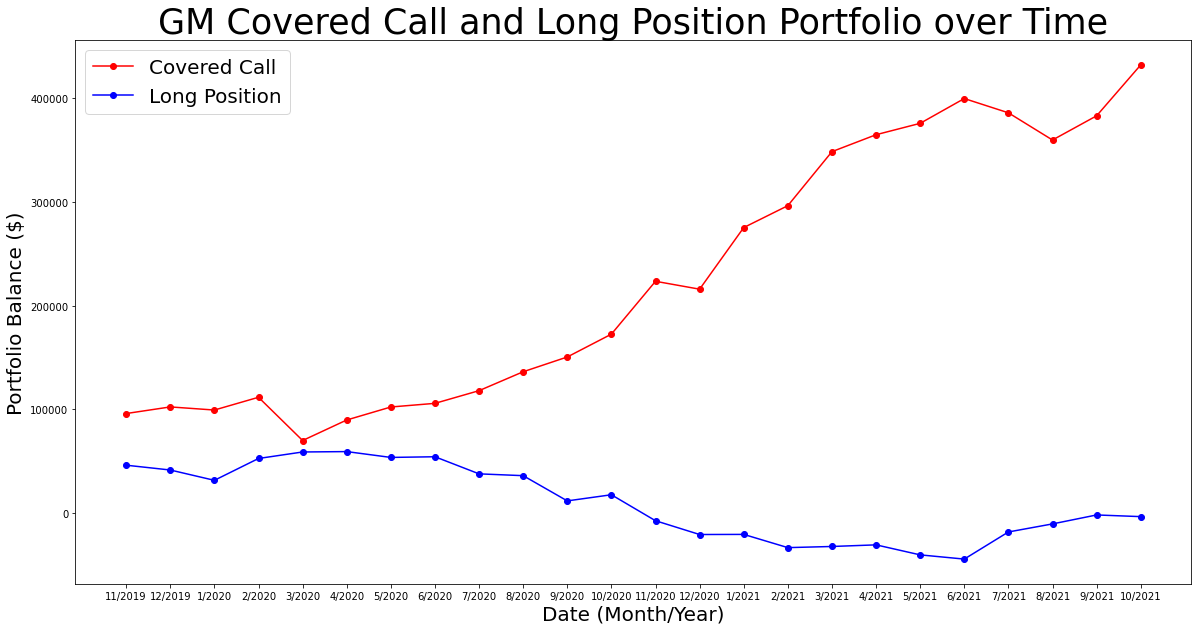

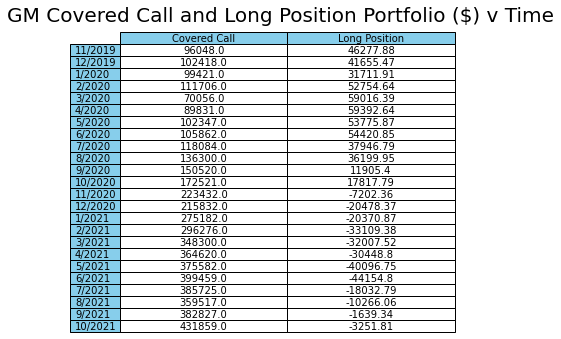

MSFT.csv
data points: 24
x-axis values: ['11/2019', '12/2019', '1/2020', '2/2020', '3/2020', '4/2020', '5/2020', '6/2020', '7/2020', '8/2020', '9/2020', '10/2020', '11/2020', '12/2020', '1/2021', '2/2021', '3/2021', '4/2021', '5/2021', '6/2021', '7/2021', '8/2021', '9/2021', '10/2021']
y-axis values: [107596.0, 116738.0, 128050.0, 124886.0, 123969.0, 144619.0, 159419.0, 173379.0, 181107.0, 194563.0, 186443.0, 189803.0, 205971.0, 216807.0, 242718.0, 237518.0, 252238.0, 265968.0, 271208.0, 292048.0, 309558.0, 327708.0, 332728.0, 370118.0]
y2-axis vals: [129876.61, 95424.93, 109261.06, 97497.57, 87785.94, 73076.39, 74809.37, 63434.08, 61084.15, 60793.01, 54179.95, 48391.79, 40350.76, 45799.25, 56335.78, 42111.47, 41071.68, 27027.59, 24227.09, 9323.44, 12304.17, 18002.22, 9316.51, 4935.53]


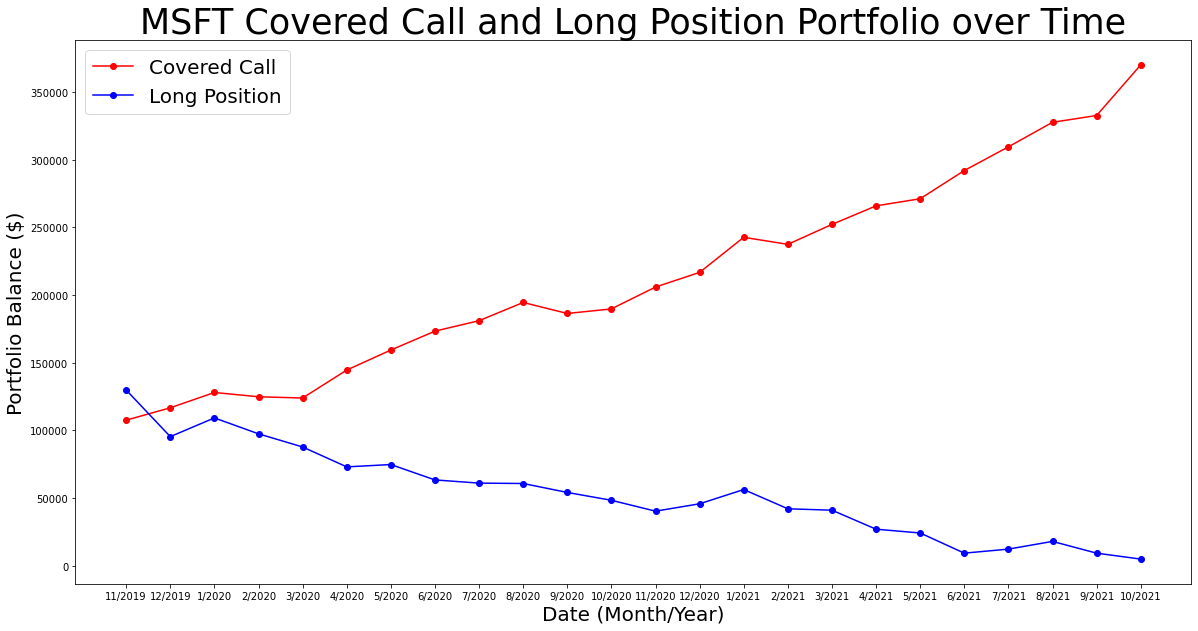

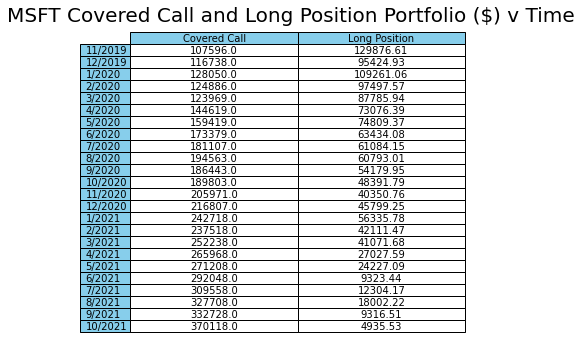

AMD.csv
data points: 24
x-axis values: ['11/2019', '12/2019', '1/2020', '2/2020', '3/2020', '4/2020', '5/2020', '6/2020', '7/2020', '8/2020', '9/2020', '10/2020', '11/2020', '12/2020', '1/2021', '2/2021', '3/2021', '4/2021', '5/2021', '6/2021', '7/2021', '8/2021', '9/2021', '10/2021']
y-axis values: [115092.0, 140467.0, 138227.0, 136771.0, 153851.0, 216046.0, 248941.0, 242179.0, 378477.0, 432381.0, 398939.0, 411037.0, 486017.0, 511133.0, 511353.0, 524938.0, 509263.0, 555243.0, 593953.0, 652426.0, 771658.0, 825405.0, 828855.0, 982455.0]
y2-axis vals: [249810.88, 199389.0, 222141.4, 208961.3, 173290.66, 132993.89, 137474.54, 128396.86, 145883.04, 149170.79, 166831.54, 169595.58, 119057.32, 138551.06, 164242.07, 125283.68, 53069.54, 56531.86, 52429.44, 32324.7, 32324.7, 36747.16, 33430.32, 13907.48]


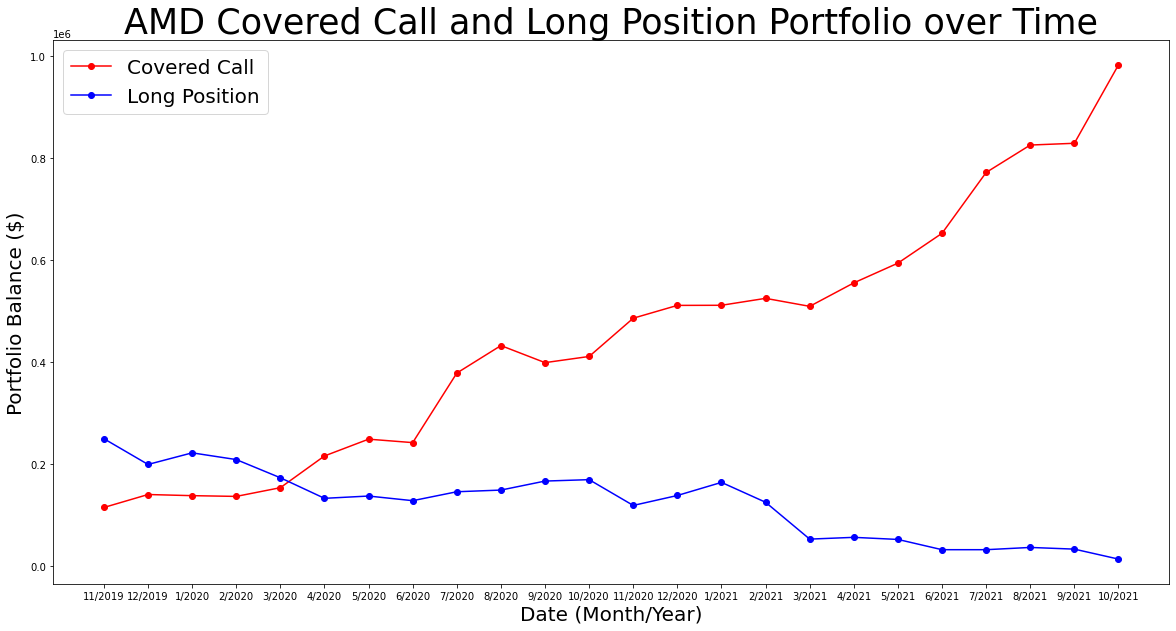

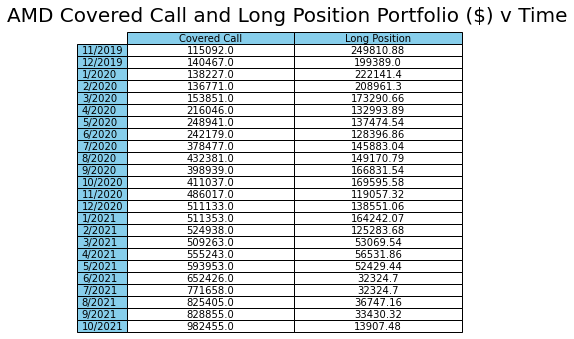

In [210]:
# graph results using matlab pyplot

outputs = '../data/outputs/covered_call/'
historical_outputs = '../data/outputs/historical_returns/'
files = [f for f in os.listdir(outputs) if os.path.isfile(os.path.join(outputs, f))]

for file in files:
    with open(os.path.join(outputs, file), 'r') as f:
        output_csv = csv.reader(f)
        rows = list(output_csv)
        
        profits = []
        monthly_balance = []
        months = []
        long_monthly_bal = []

        for line in rows[1:]:
            profits.append(round(float(line[10]), 2))
            monthly_balance.append(round(float(line[8]),2))
            date = datetime.strptime(line[0], "%Y-%m-%d").date()
            months.append(str(date.month) + '/' + str(date.year))

    with open(os.path.join(historical_outputs, file), 'r') as f:
        output_csv = csv.reader(f)
        rows = list(output_csv)
        for line in rows[1:]:
            long_monthly_bal.append(float(line[5]))
    
    print(file)
    print("data points: " + str(len(monthly_balance)))
    print('x-axis values: ' + str(months))
    print('y-axis values: ' + str(monthly_balance))
    print('y2-axis vals: ' + str(long_monthly_bal))

    x1 = months
    y1 = monthly_balance
    y2 = long_monthly_bal

    plt.figure(figsize=(20,10))
    plt.rcParams['font.size'] = '10'
    plt.plot(x1, y1, color='red', marker='o', label="Covered Call")
    plt.plot(x1, y2, color='blue', marker='o', label='Long Position')
    plt.xlabel("Date (Month/Year)", fontsize=20)
    plt.ylabel("Portfolio Balance ($)", fontsize=20)
    plt.title(file.replace('.csv', '') + ' Covered Call and Long Position Portfolio over Time', fontsize=35)
    plt.legend(fontsize=20)

    plt.savefig('../data/outputs/covered_call/graphs/' + file.replace('.csv', '') + '_balance_v_time.jpg')
    plt.show()

    columns = ('Covered Call', 'Long Position')
    rows = ['%s' % x for x in months]
    nparr1 = np.array(monthly_balance)
    nparr2 = np.array(long_monthly_bal)

    np2d = np.vstack((nparr1, nparr2)).T
    
    fig, ax = plt.subplots() 
    ax.set_axis_off() 
    table = ax.table( 
        cellText = np2d,  
        rowLabels = rows,  
        colLabels = columns, 
        rowColours =["skyblue"] * 24,  
        colColours =["skyblue"] * 24, 
        cellLoc ='center',  
        loc ='upper left')         
    
    ax.set_title(file.replace('.csv', '') + ' Covered Call and Long Position Portfolio ($) v Time',
                fontsize=20)

    plt.savefig('../data/outputs/covered_call/graphs/' + file.replace('.csv', '') + '_data_table.jpg',
                bbox_inches='tight', dpi=150)
    plt.show() 
        
